In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.decomposition import PCA
from imblearn.combine import SMOTEENN

In [12]:
data=pd.read_csv("../data/permanencia_ingenierias_modificado.csv", sep=';', encoding='latin_1',decimal=",")
data.head()

,Edad,ALERTASROJAS,ALERTASNARANJAS,ALERTASMANUALES,CAL.PSICOSOCIAL,CAL.FAMILIAR,CAL.SOCIECONOMICO,CAL.ACADEMICO,CRÉDITOS REPROBADOS,CRÉDITOS APROBADOS,...,DESERSIÓN,Advertencia académica,Estado académico normal,Primer reingreso,Segunda suspensión académica,Segundo reingreso,Suspensión académica,SEXO_F,SEXO_M,SEXO_N
0,21,14,17,0,10.31,28.21,22.37,10.61,3,65,...,0,False,True,False,False,False,False,False,True,False
1,21,14,15,0,5.15,28.21,22.37,15.15,15,84,...,0,False,True,False,False,False,False,True,False,False
2,19,13,19,0,8.25,28.21,21.05,15.15,6,8,...,1,True,False,False,False,False,False,True,False,False
3,20,12,18,0,9.28,35.9,15.79,10.61,3,44,...,0,False,True,False,False,False,False,True,False,False
4,20,12,14,0,10.31,17.95,23.68,4.55,0,149,...,0,False,True,False,False,False,False,True,False,False


In [13]:
data = data.drop(['ALERTASMANUALES', 'ALERTASNARANJAS', 'ALERTASROJAS', 'CREDITOS INTENTADOS',
                  'Edad', 'SEXO_N', 'SEXO_M', 'SEXO_F', 'APOYO INSTITUCIONAL', 'Primer reingreso',
                  'Segundo reingreso', 'CAL.ACADEMICO', 'CAL.SOCIECONOMICO', 'Segunda suspensión académica', 'CAL.FAMILIAR'], axis=1)

In [14]:
data.describe(include='all')

,CAL.PSICOSOCIAL,CRÉDITOS REPROBADOS,CRÉDITOS APROBADOS,CRÉDITOS CANCELADOS,PROMEDIO GLOBAL,APOYOS ECONÓMICO EN MATRICULA,DESERSIÓN,Advertencia académica,Estado académico normal,Suspensión académica
count,914,914.000000,914.000000,914.000000,914,914.000000,914.000000,914,914,914
unique,24,NaN,NaN,NaN,908,NaN,NaN,2,2,2
top,2.06,NaN,NaN,NaN,3.866666667,NaN,NaN,False,True,False
freq,112,NaN,NaN,NaN,2,NaN,NaN,784,739,890
mean,NaN,5.240700,43.004376,7.047046,NaN,0.704595,0.124726,NaN,NaN,NaN
std,NaN,7.456559,36.629879,10.090878,NaN,0.456474,0.330589,NaN,NaN,NaN
min,NaN,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,NaN,NaN,NaN
25%,NaN,0.000000,15.000000,0.000000,NaN,0.000000,0.000000,NaN,NaN,NaN
50%,NaN,3.000000,34.000000,3.000000,NaN,1.000000,0.000000,NaN,NaN,NaN
75%,NaN,8.000000,56.750000,9.000000,NaN,1.000000,0.000000,NaN,NaN,NaN


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 914 entries, 0 to 913
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   CAL.PSICOSOCIAL                914 non-null    object
 1   CRÉDITOS REPROBADOS            914 non-null    int64 
 2   CRÉDITOS APROBADOS             914 non-null    int64 
 3   CRÉDITOS CANCELADOS            914 non-null    int64 
 4   PROMEDIO GLOBAL                914 non-null    object
 5   APOYOS ECONÓMICO EN MATRICULA  914 non-null    int64 
 6   DESERSIÓN                      914 non-null    int64 
 7   Advertencia académica          914 non-null    bool  
 8   Estado académico normal        914 non-null    bool  
 9   Suspensión académica           914 non-null    bool  
dtypes: bool(3), int64(5), object(2)
memory usage: 52.8+ KB


In [16]:
labelencoder = LabelEncoder()
data['DESERSIÓN'] = labelencoder.fit_transform(data['DESERSIÓN'])

In [17]:
# Separar variables predictoras y variable objetivo
X = data.drop("DESERSIÓN", axis=1)
Y = data['DESERSIÓN']

In [18]:
# División de los datos en entrenamiento y prueba
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, stratify=Y)

In [19]:
# Balanceo de datos usando SMOTEENN
smote_enn = SMOTEENN(random_state=42)
X_train_bal, Y_train_bal = smote_enn.fit_resample(X_train, Y_train)

In [20]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_bal, Y_train_bal)

KNeighborsClassifier()

In [21]:
predicciones = knn.predict(X_test)
accuracy = accuracy_score(Y_test, predicciones)
print(f"Precisión del modelo: {accuracy:.2f}")

Precisión del modelo: 0.76


In [22]:

# Imprimir reporte de clasificación
print("\nReporte de Clasificación:\n", classification_report(Y_test, predicciones))


Reporte de Clasificación:
               precision    recall  f1-score   support

           0       0.94      0.78      0.85       241
           1       0.29      0.65      0.40        34

    accuracy                           0.76       275
   macro avg       0.62      0.71      0.63       275
weighted avg       0.86      0.76      0.80       275



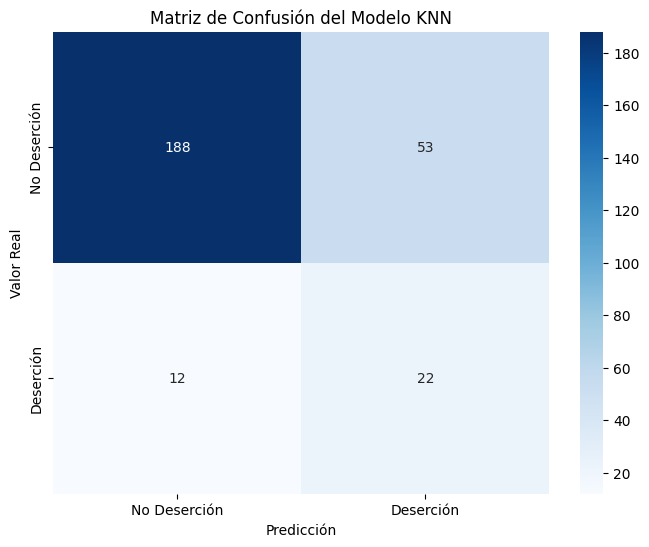

In [23]:
conf_matrix = confusion_matrix(Y_test, predicciones)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Deserción', 'Deserción'], yticklabels=['No Deserción', 'Deserción'])
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión del Modelo KNN')
plt.show()

In [24]:
pca = PCA(n_components=2)
X_train_bal_2D = pca.fit_transform(X_train_bal)

In [25]:
predicciones_bal = knn.predict(X_train_bal)

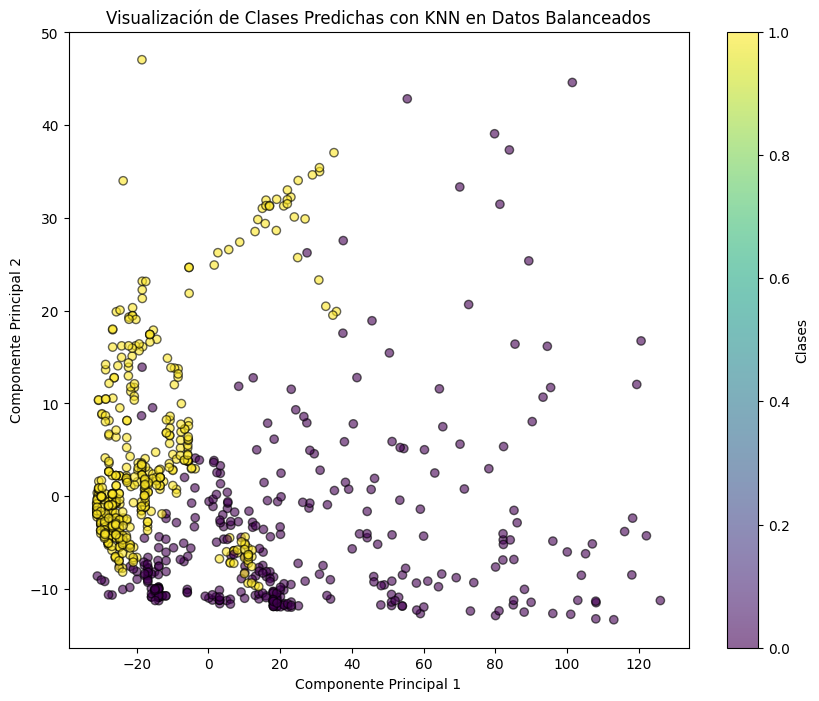

In [26]:
plt.figure(figsize=(10, 8))
plt.scatter(X_train_bal_2D[:, 0], X_train_bal_2D[:, 1], c=predicciones_bal, cmap='viridis', alpha=0.6, edgecolor='k')
plt.title("Visualización de Clases Predichas con KNN en Datos Balanceados")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.colorbar(label="Clases")
plt.show()